# Linear Regression in One Variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Reading data

In [2]:
dataFile = 'ex1data1.txt'

In [3]:
# loading data into X and Y vectors

# loading and parsing contents
matrixForm = np.loadtxt(dataFile, delimiter=',')
xOrig = matrixForm[:, 0]
yOrig = matrixForm[:, 1]
print('xOrig shape:', xOrig.shape)
print('yOrig shape:', yOrig.shape)

xOrig shape: (97,)
yOrig shape: (97,)


### Run the following print commands to understand how the parsing worked

In [ ]:
print(matrixForm)

In [ ]:
print(xOrig)

In [ ]:
print(yOrig)

## Plotting Data

Text(0,0.5,'Profits earned ($10k)')

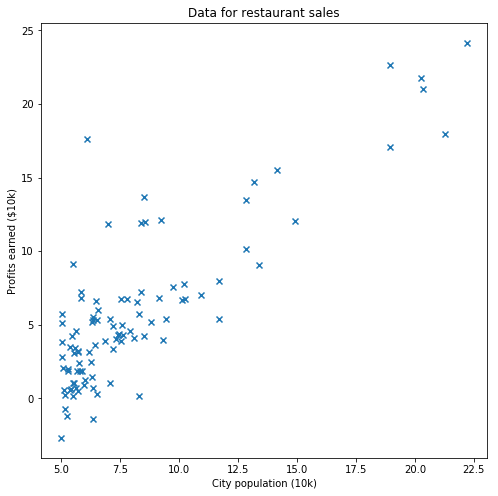

In [4]:
plt.figure(1, figsize=(8, 8))
plt.scatter(xOrig, yOrig, marker='x')
plt.title('Data for restaurant sales')
plt.xlabel('City population (10k)')
plt.ylabel('Profits earned ($10k)')

## Setting up Training Data

### Testing the following hypothesis
1. $h_1 = \beta_0 . x + \beta_1 . x$
    - Straight line fit
------------
2. $h_2 = \beta_0 . x + \beta_1 . x + \beta_2 . \sqrt{x}$
    - Square root function similar to that in lecture. Will have a asymtotic shape
------------
3. $h_3 = \beta_0 . x + \beta_1 . x + \beta_2 . x^2 + \beta_3 . x^3$
    - Increasing function with a dip (mentioned in lecture).

In [5]:
# Number of exapmles
M = xOrig.shape[0]

# the x vector is of shape 1 x M, i.e. each column is one training example
x0 = np.ones(M).reshape(M, 1)           # x0 = 1
x1 = xOrig.copy().reshape(M, 1)                # x1 = x
x2 = np.square(xOrig).reshape(M, 1)     # x2 = x^2
x3 = np.power(xOrig, 3).reshape(M, 1)   # x3 = x^3
x4 = np.sqrt(xOrig).reshape(M, 1)       # x4 = x^0.5

# y vector is of shape 1 x M
y = yOrig.reshape(M, 1)

In [46]:
# defining three hypotheses with zeros as initialization
#hypothesisOne = np.zeros((2, 1))
#hypothesisTwo = np.zeros((3, 1))
#hypothesisThree = np.zeros((4, 1))

hypothesisOne = np.random.rand(2, 1)
hypothesisTwo = np.random.rand(3, 1)
hypothesisThree = np.random.rand(4, 1)

# defining training data with shapes n x M where n = number of features
trDataOne = x1
trDataTwo = np.concatenate((x1, x4), axis=1)
trDataThree = np.concatenate((x1, x2, x3), axis=1)

trOneMean = np.mean(trDataOne, axis=0)
trOneStd = np.std(trDataOne, axis=0)
trTwoMean = np.mean(trDataTwo, axis=0)
trTwoStd = np.std(trDataTwo, axis=0)
trThreeMean = np.mean(trDataThree, axis=0)
trThreeStd = np.std(trDataThree, axis=0)

trDataOne = np.concatenate((x0, trDataOne), axis=1)
trDataTwo = np.concatenate((x0, trDataTwo), axis=1)
trDataThree = np.concatenate((x0, trDataThree), axis=1)

## Functions

In [47]:
def get_hTheta(hypothesis, trainingSet):
    return np.dot(trainingSet, hypothesis)

In [48]:
def get_cost(hypothesis, trainingSet, y):
    return 1/(2 * trainingSet.shape[0]) * np.sum(np.square(get_hTheta(hypothesis, trainingSet)-y))

In [49]:
def get_differential(hypothesis, trainingSet, y):
    return 1/(trainingSet.shape[0]) * np.dot(trainingSet.transpose(), get_hTheta(hypothesis, trainingSet)-y)

In [50]:
def gradient_descent(hypothesis, trainingSet, y, num_iterations, learning_rate):
    costs = np.zeros(num_iterations + 1)
    costs[0] = get_cost(hypothesis, trainingSet, y)
    for iteration in range(num_iterations):
        hypothesis -= learning_rate * get_differential(hypothesis, trainingSet, y)
        costs[iteration + 1] = get_cost(hypothesis, trainingSet, y)
    return (hypothesis, costs)

In [51]:
def train_model(model):
    trainingSet = model['trainingX'].copy()
    y = model['trainingY']
    initialHypothesis = model['hypothesis']
    num_iterations = model['num_iterations']
    learning_rate = model['learning_rate']
    if (model['feature_scaling']):
        trainingSet[:, 1:] = (trainingSet[:, 1:] - model['xMean']) / model['xStd']
    (finalHypothesis, costs) = gradient_descent(initialHypothesis, trainingSet, y, num_iterations, learning_rate)
    model['hypothesis'] = finalHypothesis
    model['costs'] = costs

## Learning

In [52]:
num_iterations = 5000
learning_rate = 0.008

Models = [
    {
        'name': 'Straight Line',
        'trainingX': trDataOne,
        'trainingY': y,
        'hypothesis': hypothesisOne.copy(),
        'num_iterations': num_iterations,
        'learning_rate': learning_rate,
        'costs': None,
        'xMean': trOneMean,
        'xStd': trOneStd,
        'feature_scaling': False
    
    },
     {
         'name':  'Square root',
        'trainingX': trDataTwo,
        'trainingY': y,
        'hypothesis': hypothesisTwo.copy(),
        'num_iterations': num_iterations,
        'learning_rate': learning_rate,
         'costs': None,
         'xMean': trTwoMean,
         'xStd': trTwoStd,
         'feature_scaling': True
    },
     {
         'name': 'Cubic',
        'trainingX': trDataThree,
        'trainingY': y,
        'hypothesis': hypothesisThree.copy(),
        'num_iterations': num_iterations,
        'learning_rate': learning_rate,
         'costs': None,
         'xMean': trThreeMean,
         'xStd': trThreeStd,
         'feature_scaling': True
    }
]

In [53]:
# initial cost for straight line model
get_cost(Models[0]['hypothesis'], Models[0]['trainingX'], Models[0]['trainingY'])

14.838835344138547

In [54]:
# actual training
for model in Models:
    train_model(model)

In [55]:
Models[0]['hypothesis']

array([[-3.89263156],
       [ 1.19271726]])

## Plotting Results

### Cost Functions vs Iterations

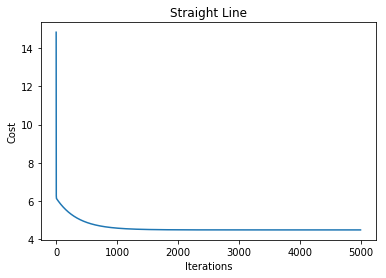

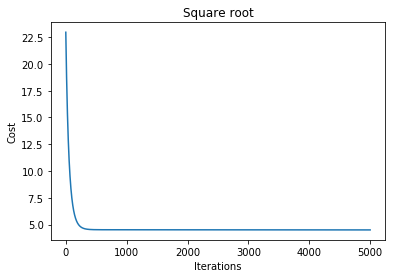

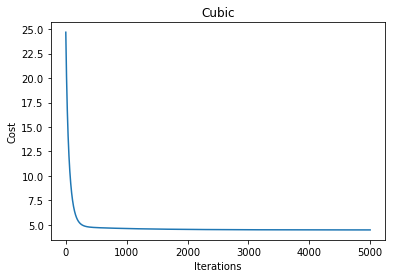

In [56]:
for model in Models:
    plt.figure()
    plt.plot(model['costs'])
    plt.title(model['name'])
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

### Hypothesis against data

*The following graphs are haphazard and lack elegance. The proper way would be to add the feature normalization logic to the model itself or a generalized feature normalization function* 

In [64]:
model = Models[1]
mock_x = np.arange(0, 25, 0.01)
length = mock_x.shape[0]
mock_x = mock_x.reshape(length, 1)
mock_x2 = np.sqrt(mock_x)
mock_x = np.concatenate((mock_x, mock_x2), axis=1)
mock_x = (mock_x - model['xMean']) / model['xStd']
mock_x = np.concatenate((np.ones(length).reshape(length, 1), mock_x), axis=1)
hypothesis = model['hypothesis']
result = get_hTheta(hypothesis=hypothesis, trainingSet=mock_x)

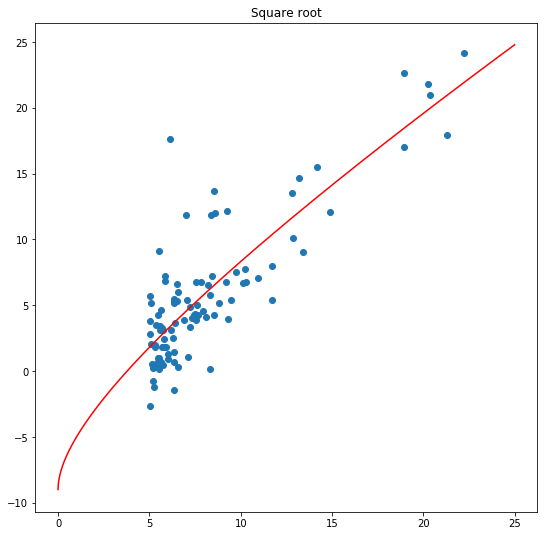

In [65]:
plt.figure(figsize=(9, 9))
plt.plot(np.arange(0, 25, 0.01), result, 'r')
plt.title(model['name'])
plt.scatter(xOrig, yOrig)

In [68]:
model = Models[0]
mock_x = np.arange(0, 25, 0.01)
length = mock_x.shape[0]
mock_x = mock_x.reshape(length, 1)
mock_x = np.concatenate((np.ones(length).reshape(length, 1), mock_x), axis=1)
hypothesis = model['hypothesis']
result = get_hTheta(hypothesis=hypothesis, trainingSet=mock_x)

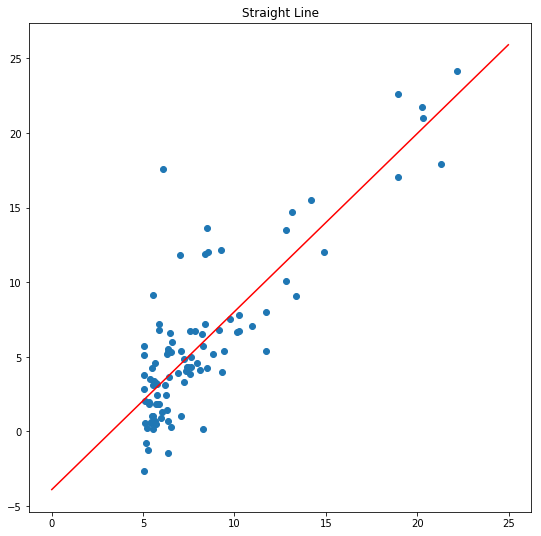

In [69]:
plt.figure(figsize=(9, 9))
plt.plot(np.arange(0, 25, 0.01), result, 'r')
plt.title(model['name'])
plt.scatter(xOrig, yOrig)

In [70]:
model = Models[2]
mock_x = np.arange(0, 25, 0.01)
length = mock_x.shape[0]
mock_x = mock_x.reshape(length, 1)
mock_x2 = np.power(mock_x, 2)
mock_x3 = np.power(mock_x, 3)
mock_x = np.concatenate((mock_x, mock_x2, mock_x3), axis=1)
mock_x = (mock_x - model['xMean']) / model['xStd']
mock_x = np.concatenate((np.ones(length).reshape(length, 1), mock_x), axis=1)
hypothesis = model['hypothesis']
result = get_hTheta(hypothesis=hypothesis, trainingSet=mock_x)

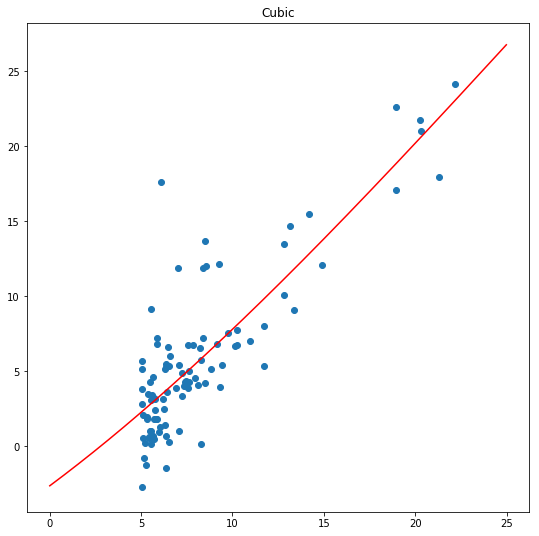

In [71]:
plt.figure(figsize=(9, 9))
plt.plot(np.arange(0, 25, 0.01), result, 'r')
plt.title(model['name'])
plt.scatter(xOrig, yOrig)